# 1.Understanding the Data:

Import necessary libraries (e.g., pandas, matplotlib, seaborn).<br>
Load the COVID-19 dataset.<br>
Display basic information about the dataset (e.g., data types, missing values).<br>

In [2]:
# load required libraries/modules

# Load the dataset
import pandas as pd

df=pd.read_csv(r'C:\Users\DELL\Analytics\Python\Project\NovelCoronovirusDataset\covid_19_data.csv')

# Display basic information about the dataset
df


,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
306424,306425,05/29/2021,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306425,306426,05/29/2021,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306426,306427,05/29/2021,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306427,306428,05/29/2021,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0


# 2. Data Cleaning:

In [ ]:
Handle missing values.
Convert data types if necessary.
Check for duplicates.

In [ ]:
# Handle missing values
# Convert data types if necessary ( ObservationDate    datetime64[ns]) change to datetime
# df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])
# Check for duplicates
# print("Number of duplicates:", df.duplicated().sum())


## Handle missing values

In [17]:
df.isna().sum()

SNo                    0
ObservationDate        0
Province/State     78103
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

In [4]:
df.dtypes

SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object

In [5]:
df.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [18]:
for i in df.columns:
    df[i].dtypes=='object'
    m=df[i].mode()[0]
    df[i]=df[i].fillna(m)

In [19]:
df.isna().sum()

SNo                0
ObservationDate    0
Province/State     0
Country/Region     0
Last Update        0
Confirmed          0
Deaths             0
Recovered          0
dtype: int64

# Check for duplicates

In [9]:
df.nunique()

SNo                306429
ObservationDate       494
Province/State        736
Country/Region        229
Last Update          1905
Confirmed          107146
Deaths              20089
Recovered           74541
dtype: int64

In [35]:
print("Number of duplicates:", df.nunique().sum())


Number of duplicates: 511569


# 3. Descriptive Statistics:

Generate descriptive statistics (mean, median, min, max) for numeric columns.<br>
Explore summary statistics for categorical columns.

In [ ]:
# Descriptive statistics
# Summary statistics for categorical columns

In [5]:
# Descriptive statistics
print(df.describe())

# Summary statistics for categorical columns
print(df['Country/Region'].value_counts())

                 SNo     Confirmed         Deaths     Recovered
count  306429.000000  3.064290e+05  306429.000000  3.064290e+05
mean   153215.000000  8.567091e+04    2036.403268  5.042029e+04
std     88458.577156  2.775516e+05    6410.938048  2.015124e+05
min         1.000000 -3.028440e+05    -178.000000 -8.544050e+05
25%     76608.000000  1.042000e+03      13.000000  1.100000e+01
50%    153215.000000  1.037500e+04     192.000000  1.751000e+03
75%    229822.000000  5.075200e+04    1322.000000  2.027000e+04
max    306429.000000  5.863138e+06  112385.000000  6.399531e+06
Country/Region
Russia                 30251
US                     26740
Japan                  18059
Mainland China         15758
India                  13182
                       ...  
 Azerbaijan                1
North Ireland              1
Republic of Ireland        1
Cape Verde                 1
East Timor                 1
Name: count, Length: 229, dtype: int64


# 4. Time Series Analysis:

Analyze the trends in confirmed, deaths, and recovered cases over time.<br>
Create time-based visualizations.

In [ ]:
# Time series analysis
# groupby 'ObservationDate' and apply aggregation functions like sum on deaths,confirmed ,recovered 
# df_time = df.groupby('ObservationDate').agg({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum'})

# Plot time series data using line plot
# syntax: 
#sns.lineplot(data=df_time, x='ObservationDate', y='Confirmed', label='Confirmed')
# sns.lineplot(data=df_time, x='ObservationDate', y='Deaths', label='Deaths')


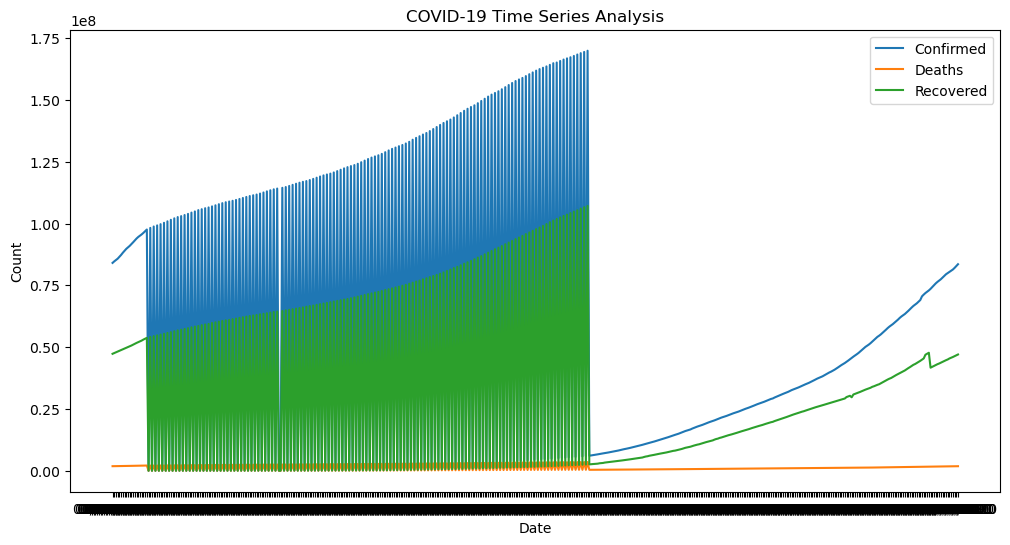

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Time series analysis
df_time = df.groupby('ObservationDate').agg({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum'})

# Plot time series data
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_time, x='ObservationDate', y='Confirmed', label='Confirmed')
sns.lineplot(data=df_time, x='ObservationDate', y='Deaths', label='Deaths')
sns.lineplot(data=df_time, x='ObservationDate', y='Recovered', label='Recovered')
plt.title('COVID-19 Time Series Analysis')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

# 5. Geographical Analysis:

Analyze the distribution of cases across different countries/regions.<br>
Create geographical visualizations (e.g., world map).

In [ ]:
# Geographical analysis
# df_country = df.groupby('Country/Region').agg({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum'})

# Plot geographical data
# sns.barplot(x=df_country.index, y='Confirmed', data=df_country)



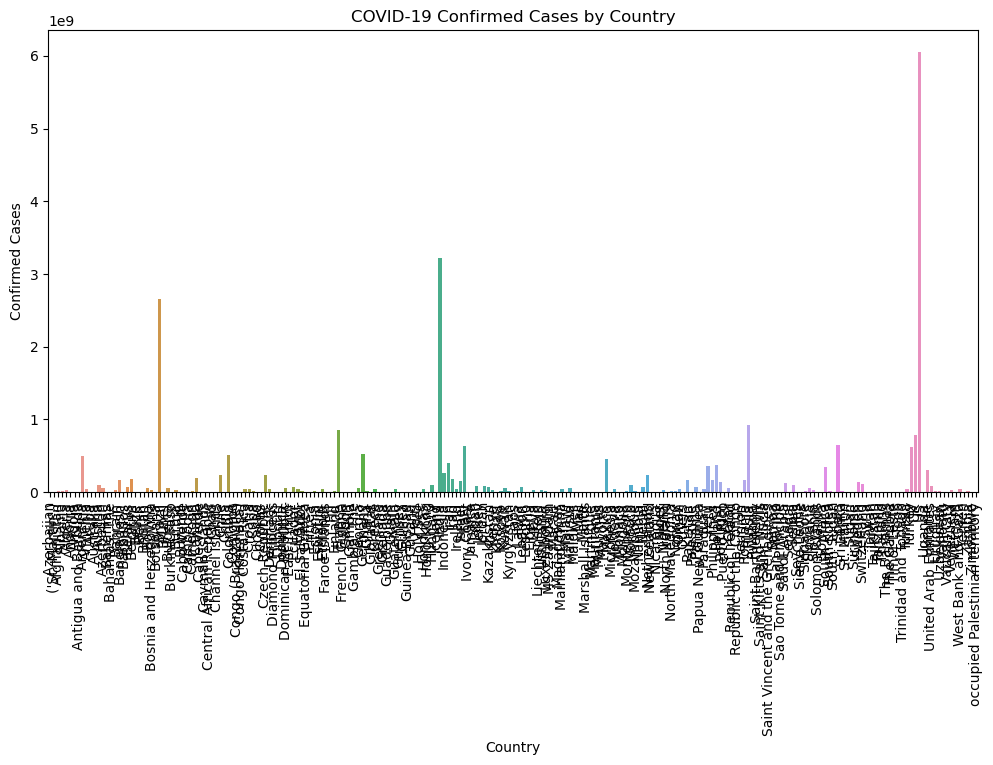

In [18]:
# Geographical analysis
df_country = df.groupby('Country/Region').agg({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum'})

# Plot geographical data
plt.figure(figsize=(12, 6))
sns.barplot(x=df_country.index, y='Confirmed', data=df_country)
plt.title('COVID-19 Confirmed Cases by Country')
plt.xlabel('Country')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=90, ha='center')
plt.show()

# 6. Correlation Analysis:

Examine the correlation between different numeric variables.

In [ ]:
# Correlation analysis between confirmed,deaths and recovered
# Plot correlation on heat map

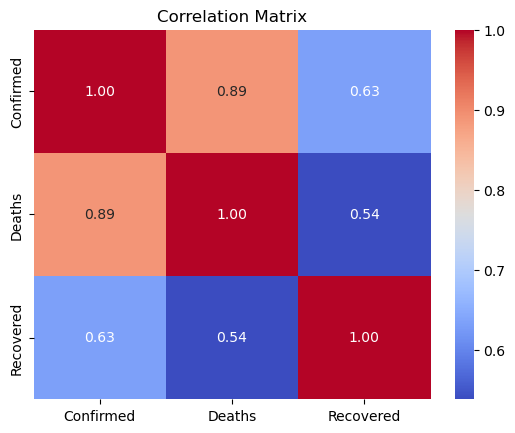

In [19]:
# Correlation analysis
correlation_matrix = df[['Confirmed', 'Deaths', 'Recovered']].corr()

# Plot correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# 7. Advanced Analysis:

Explore advanced visualizations or statistical tests based on the specific questions you want to answer.

In [12]:
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
306424,306425,05/29/2021,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306425,306426,05/29/2021,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306426,306427,05/29/2021,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306427,306428,05/29/2021,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0


# Calculate the total number of confirmed cases, deaths, and recoveries for each country/region.

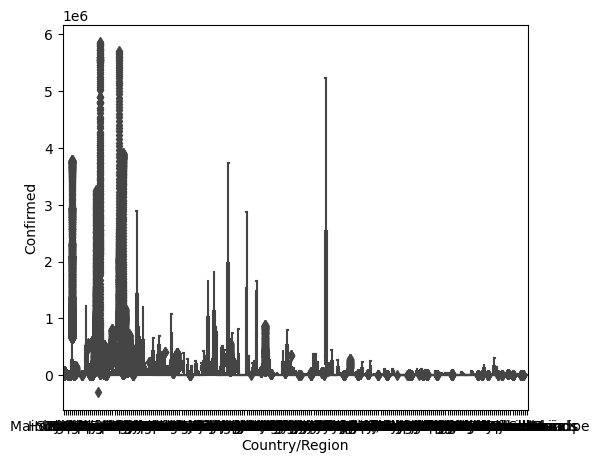

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,5))

sns.heatmap(c,annot=True,cmap='Set1')
plt.show()

# Identify the countries/regions with the highest number of confirmed cases, deaths, and recoveries.



# Visualize the distribution of deaths using bar chart



In [24]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

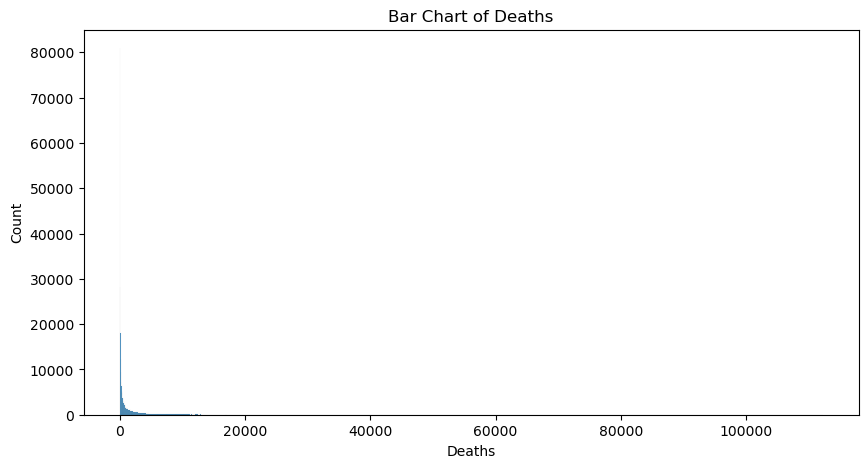

In [29]:
plt.figure(figsize=(10,5))
plt.xlabel=('Deaths')
plt.title('Bar Chart of Deaths')
sns.histplot(x='Deaths',data=df)
plt.show()